### sprint 3
model building

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [48]:
imageSize = [299, 299]

In [51]:
#importing data set
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(
    rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [38]:
training_set = train_datagen.flow_from_directory(
    "../../dataset/preprocessed dataset/training", target_size = (299, 299), batch_size=32, class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
    "../../dataset/preprocessed dataset/testing", target_size=(299, 299), batch_size=32, class_mode='categorical')


Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [39]:
xception = Xception(input_shape=imageSize + [3], weights='imagenet', include_top=False)
xception.layers

In [40]:
for layer in xception.layers:
    layer.trainable = False

In [41]:
x = Flatten()(xception.output)

In [42]:
prediction = Dense(64, activation="relu")(x)
prediction = Dense(32, activation="relu")(prediction)
prediction = Dense(5, activation="softmax")(prediction)

model = Model(inputs = xception.input, outputs=prediction)

In [43]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [45]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.5,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [46]:
r = model.fit(training_set, validation_data=test_set, epochs=30, steps_per_epoch=len(training_set)//32, validation_steps=len(test_set)//32,callbacks=[callback])

Epoch 1/30


ValueError: in user code:

    File "d:\projects\IBM\env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\training.py", line 894, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\compile_utils.py", line 480, in update_state
        self.build(y_pred, y_true)
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\compile_utils.py", line 393, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\compile_utils.py", line 526, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\compile_utils.py", line 526, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "d:\projects\IBM\env\lib\site-packages\keras\engine\compile_utils.py", line 545, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "d:\projects\IBM\env\lib\site-packages\keras\metrics\__init__.py", line 182, in get
        return deserialize(str(identifier))
    File "d:\projects\IBM\env\lib\site-packages\keras\metrics\__init__.py", line 138, in deserialize
        return deserialize_keras_object(
    File "d:\projects\IBM\env\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: val_loss. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
model.save("updated_Xception.h5")

### testing

In [52]:
model = load_model('updated_Xception.h5')

In [53]:
predicted = model.predict(test_set)

23/23 [==============================] - 103s 5s/step


In [54]:
actualClass = test_set.classes


In [55]:
_prediction = np.argmax(predicted, axis=1)
_prediction

array([3, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 3, 0, 2,
       1, 3, 1, 2, 0, 1, 1, 3, 3, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 3,
       0, 1, 0, 1, 1, 0, 3, 3, 1, 3, 0, 0, 1, 4, 0, 0, 3, 1, 2, 2, 1, 2,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 3, 3, 3, 1, 1,
       1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 1, 3, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 4, 3, 1, 0, 0, 2, 0, 0, 3,
       3, 4, 0, 1, 3, 4, 1, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 3, 0, 1, 1, 3, 0, 3, 0, 3, 3, 0, 1, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 3, 1, 1, 3, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 3, 1, 3, 1, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 3, 0, 1, 0,
       3, 1, 0, 1, 1, 0, 1, 0, 3, 0, 1, 1, 1, 0, 2, 1, 3, 4, 0, 1, 3, 2,
       0, 1, 0, 0, 0, 3, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 4, 0,

In [56]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actualClass, _prediction)
confusion_matrix


array([[181,  87,  29,  57,   7],
       [ 41,  16,   5,  11,   1],
       [102,  47,  15,  29,   7],
       [ 23,   8,   0,   6,   2],
       [ 32,  14,   1,   5,   8]], dtype=int64)

In [57]:
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix)


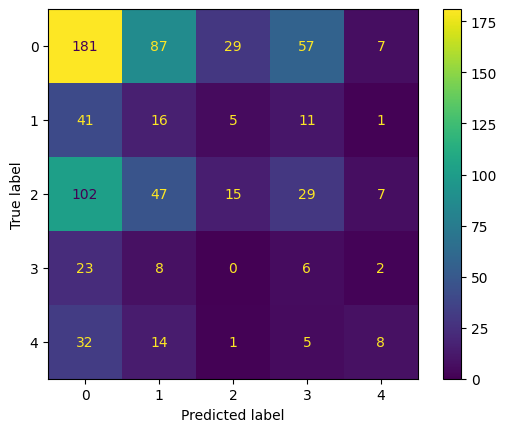

In [58]:
cm_display.plot()
plt.show()


In [59]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(actualClass, _prediction))
print('Precision score is :', metrics.precision_score(
    actualClass, _prediction, average='weighted'))
print('Recall score is :', metrics.recall_score(
    actualClass, _prediction, average='weighted'))
print('F1 Score is :', metrics.f1_score(
    actualClass, _prediction, average='weighted'))
print('Cohen Kappa Score:', metrics.cohen_kappa_score(actualClass, _prediction))
print('\t\tClassification Report:\n', metrics.classification_report(actualClass,_prediction,target_names=['0', '1', '2', '3', '4']))

Accuracy score is : 0.3079019073569482
Precision score is : 0.3551145524908687
Recall score is : 0.3079019073569482
F1 Score is : 0.30613229519605784
Cohen Kappa Score: 0.0016733735478463574
		Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49       361
           1       0.09      0.22      0.13        74
           2       0.30      0.07      0.12       200
           3       0.06      0.15      0.08        39
           4       0.32      0.13      0.19        60

    accuracy                           0.31       734
   macro avg       0.25      0.22      0.20       734
weighted avg       0.36      0.31      0.31       734



PR Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(actualClass, _prediction)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

ROC CURVE

In [ ]:
fpr, tpr = roc_curve(actualClass, _prediction)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()